# Name: Week 7 SVM Example(A Simple Binary Classification)

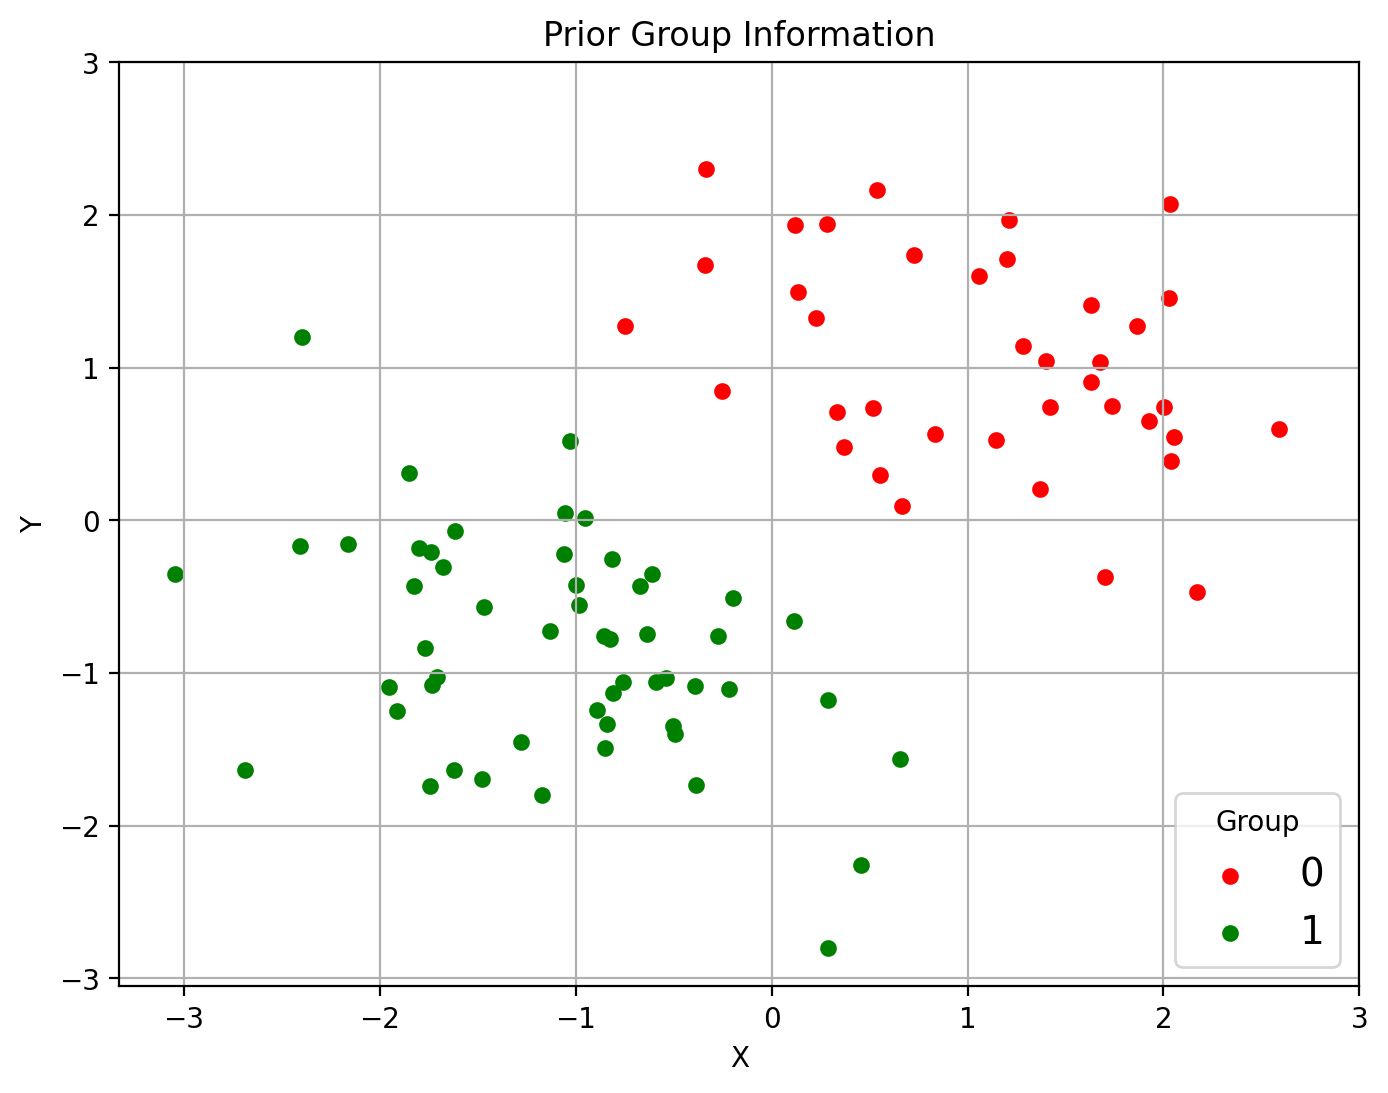

In [1]:

import matplotlib.pyplot as plt
import numpy
import pandas
import sys

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

from sklearn import metrics, svm

trainData = pandas.read_excel('MVN.xlsx', sheet_name = 'MVN')

# Scatterplot that uses prior information of the grouping variable
carray = ['red', 'green']
plt.figure(figsize = (8,6), dpi=200)
for i in range(2):
    subData = trainData[trainData['Group'] == i]
    plt.scatter(x = subData['X'], y = subData['Y'], c = carray[i], label = i, s = 25)
plt.xticks(numpy.arange(-3.0, 4.0, 1.0))
plt.yticks(numpy.arange(-3.0, 4.0, 1.0))
plt.grid(True)
plt.title('Prior Group Information')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title = 'Group', loc = 'lower right', bbox_to_anchor = (1, 0), fontsize = 14)
plt.show()


In [25]:
trainData.head()

,Group,X,Y,_PredictedClass_,radius,theta,y_pred_Polar
0,1,-5.9399549800,0.8467200484,2,6.0000000004,3.0000000000,1
1,1,-5.6533340440,2.0099289009,2,6.0000000000,2.8000000000,1
2,1,-5.4648895760,1.9429312709,2,5.8000000001,2.8000000000,1
3,1,-5.2764451080,1.8759336409,2,5.6000000002,2.8000000000,1
4,1,-5.1413325200,3.0930082309,2,5.9999999998,2.6000000000,1


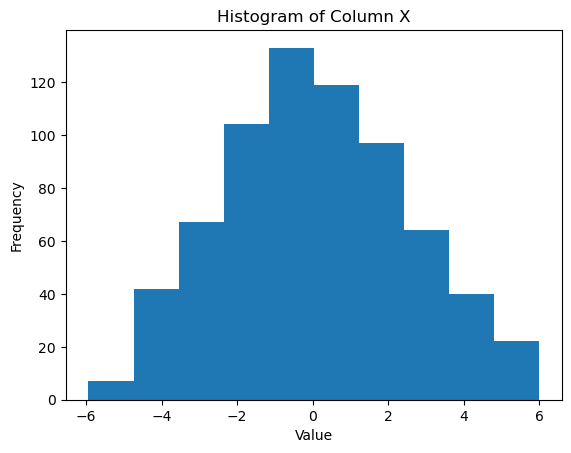

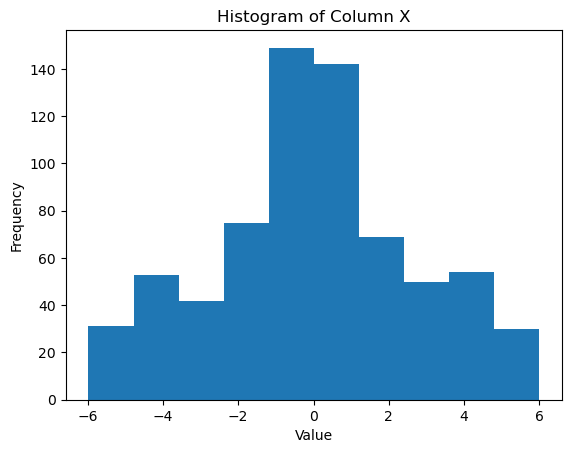

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming trainData is your DataFrame and 'X' is the column name
# Plotting the histogram
plt.hist(trainData['X'], bins=10)  # You can adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column X')
plt.show()

plt.hist(trainData['Y'], bins=10)  # You can adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column X')
plt.show()


In [38]:
trainData['Group'].value_counts()
#trainData['Group'].unique()

Group
2    330
1    255
3    110
Name: count, dtype: int64

In [32]:
trainData= trainData.dropna().reset_index(drop=True)
xTrain=trainData[['X','Y']]
yTrain=trainData['Group']

svm_Model=svm.LinearSVC(verbose = 0, dual = False, C = 1, random_state = 20221225)
thisFit= svm_Model.fit(xTrain, yTrain)
yTrain_pred=thisFit.predict(xTrain)

print('Number of Iteration =', thisFit.n_iter_)
print('Intercept = ', thisFit.intercept_)
print('Coefficients = ', thisFit.coef_)

Number of Iteration = 6
Intercept =  [-0.7907879786 -0.0458674277 -0.6912960209]
Coefficients =  [[ 0.350118031   0.7958896976]
 [-0.275115583  -0.2936047   ]
 [ 0.0562631402 -0.0518425711]]


In [7]:
w = thisFit.coef_[0]

print('=== General Equation Form ===')
eq_str = str(thisFit.intercept_[0]) + ' + ' + str(w[0]) + ' * X + ' + str(w[1]) + ' * Y = 0'
print(eq_str)

# Convert to y = a + mx form
coef_m = - numpy.divide(w[0], w[1])
coef_a = numpy.divide(thisFit.intercept_[0], w[1]) 

print('=== Slope-Intercept Equation Form ===')
eq_str = 'Y = ' + str(coef_a) + ' + ' + str(coef_m) + ' * X'
print(eq_str)

print('\n=== Confusion Matrix === ')
print(metrics.confusion_matrix(yTrain, yTrain_pred))


=== General Equation Form ===
0.03880051243227728 + -1.0365956393892788 * X + -1.2234912436464775 * Y = 0
=== Slope-Intercept Equation Form ===
Y = -0.031712946564812945 + -0.8472440197445325 * X

=== Confusion Matrix === 
[[38  0]
 [ 0 54]]


## Conclude
- zero misclassification rate!

In [33]:
w

array([-0.2871486078, -0.8098630572])

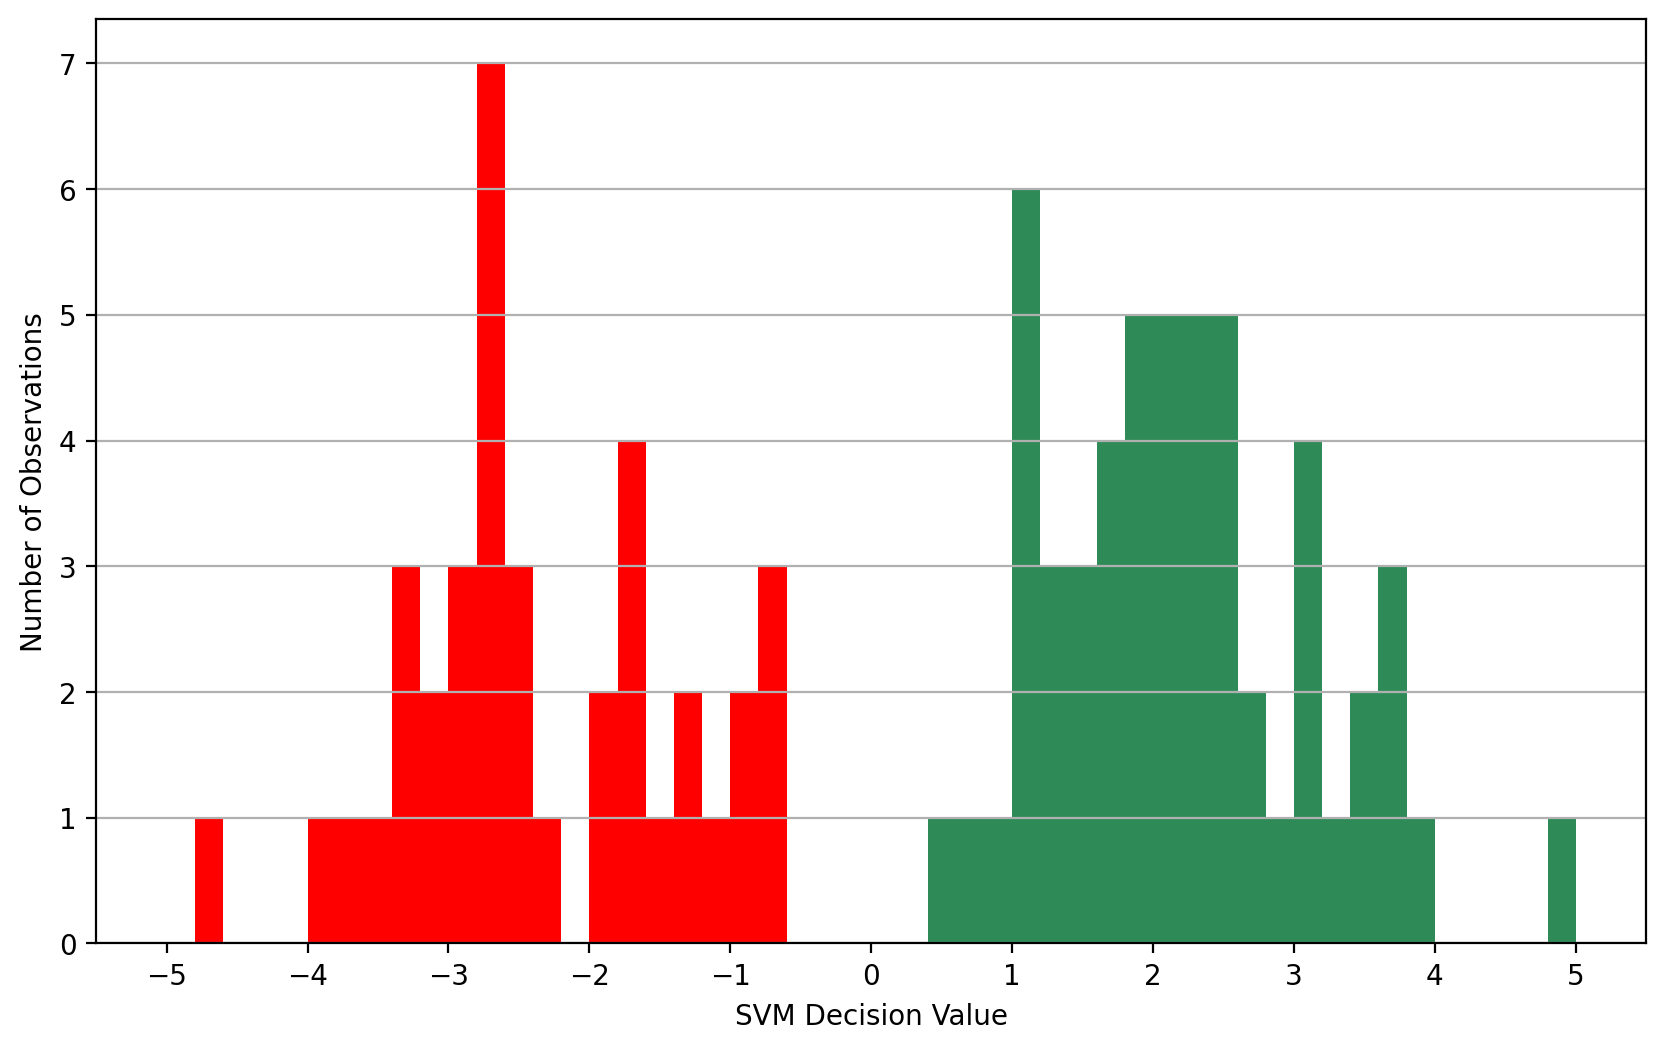

In [3]:
trainData['Decision'] = thisFit.decision_function(xTrain)

decision = trainData['Decision']
plt.figure(figsize = (10,6), dpi=200)
posDecision = trainData[trainData['Decision'] > 0.0]['Decision']
plt.hist(decision[decision > 0.0], bins = numpy.arange(-5.0, 5.2, 0.2), align = 'mid', color = 'seagreen')
plt.hist(decision[decision < 0.0], bins = numpy.arange(-5.0, 5.2, 0.2), align = 'mid', color = 'red')
plt.xlabel('SVM Decision Value')
plt.ylabel('Number of Observations')
plt.xticks(numpy.arange(-5.0, 6.0, 1.0))
plt.grid(axis = 'y')
plt.show()


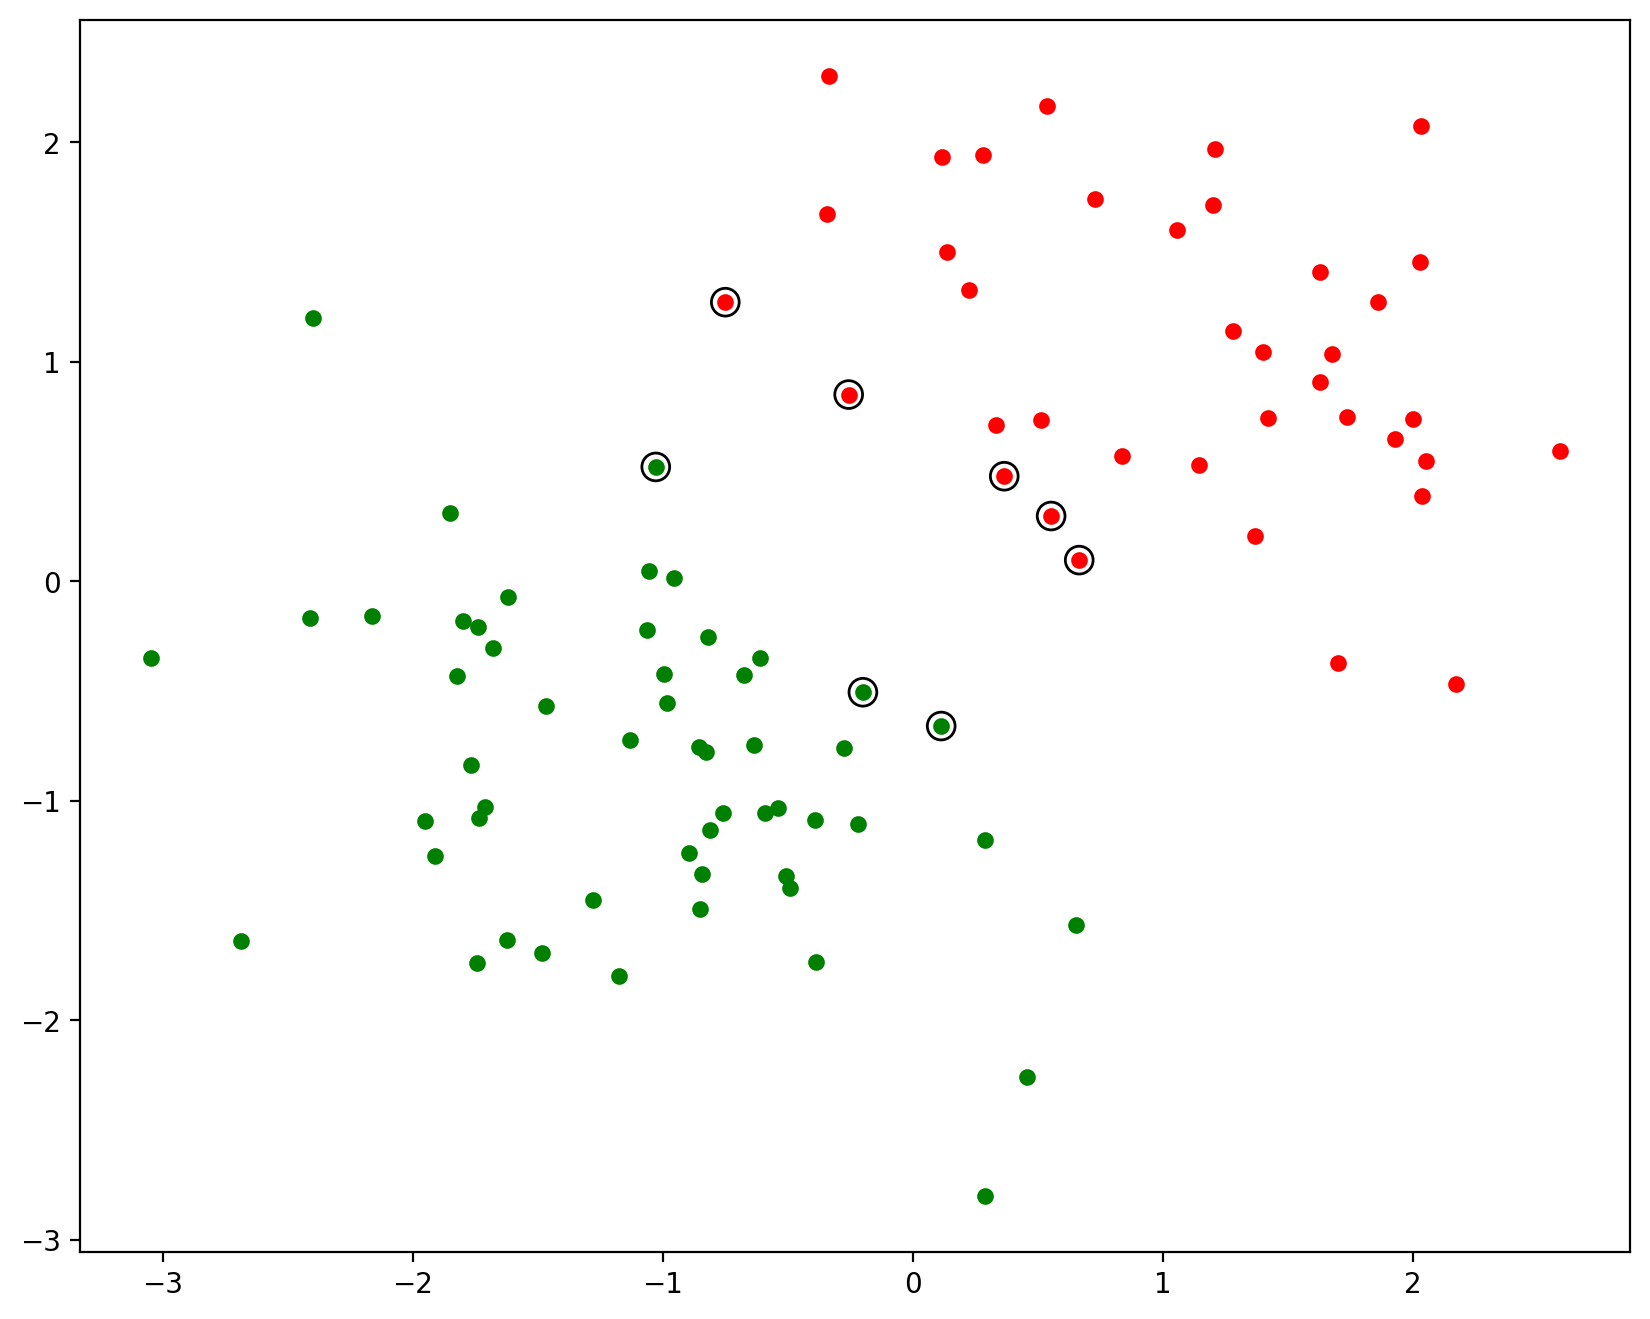

In [4]:

# plot the parallels to the separating hyperplane that pass through the
# support vectors
eps_double = numpy.finfo(numpy.float64).eps

trainData['ABS Decision'] = decision.apply(numpy.abs)
support_vectors = trainData[trainData['ABS Decision'] <= (eps_double + 1.0)]
support_vectors = support_vectors.sort_values(by = ['Group', 'ABS Decision'])

# plot the line, the points, and the nearest vectors to the plane
carray = ['red', 'green']
plt.figure(figsize = (10,8), dpi = 200)
for i in range(2):
    plot_data = trainData[yTrain_pred == i]
    plt.scatter(x = plot_data['X'], y = plot_data['Y'], c = carray[i], label = 'Predicted Group' + str(i), s = 25)

# Highlight the support vectors
plt.scatter(support_vectors['X'], support_vectors['Y'], s = 100, linewidth = 1, facecolors="none",  edgecolors="k")



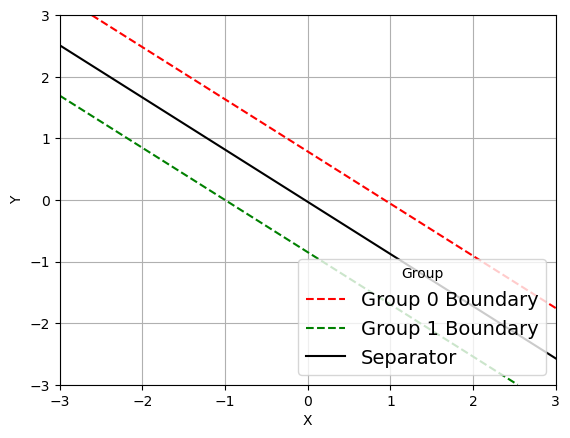

In [5]:
x_value = numpy.mean(support_vectors['X'])
invw1 = numpy.divide(1.0, w[1])

# Draw the lower boundary where Decision is -1
y_value = coef_a + coef_m * x_value - invw1
plt.axline((x_value, y_value), slope = coef_m, linestyle = 'dashed', color = 'red', label = 'Group 0 Boundary')    

# Draw the lower boundary where Decision is +1
y_value = coef_a + coef_m * x_value + invw1
plt.axline((x_value, y_value), slope = coef_m, linestyle = 'dashed', color = 'green', label = 'Group 1 Boundary')    

# Draw the separating hyperplane
y_value = coef_a + coef_m * x_value
plt.axline((x_value, y_value), slope = coef_m, linestyle = 'solid', color = 'black', label = 'Separator')    

plt.xticks(numpy.arange(-3.0, 4.0, 1.0))
plt.yticks(numpy.arange(-3.0, 4.0, 1.0))
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title = 'Group', loc = 'lower right', bbox_to_anchor = (1, 0), fontsize = 14)
plt.show()

# Name: Week 7 HMEQ SVM(Feature Selection)

In [40]:

import matplotlib.pyplot as plt
import numpy
import pandas
import sys

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

from sklearn import metrics, svm

hmeq = pandas.read_csv('hmeq.csv')

hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,"25,860.0000000000","39,025.0000000000",HomeImp,Other,10.5000000000,0.0000000000,0.0000000000,94.3666666670,1.0000000000,9.0000000000,NaN
1,1,1300,"70,053.0000000000","68,400.0000000000",HomeImp,Other,7.0000000000,0.0000000000,2.0000000000,121.8333333300,0.0000000000,14.0000000000,NaN
2,1,1500,"13,500.0000000000","16,700.0000000000",HomeImp,Other,4.0000000000,0.0000000000,0.0000000000,149.4666666700,1.0000000000,10.0000000000,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,"97,800.0000000000","112,000.0000000000",HomeImp,Office,3.0000000000,0.0000000000,0.0000000000,93.3333333330,0.0000000000,14.0000000000,NaN


In [41]:
X_name = ['CLAGE','CLNO','DELINQ','DEROG','NINQ','YOJ']
y_name = 'BAD'

train_data = hmeq[X_name + [y_name]].dropna().reset_index(drop = True)

# Set dual = False because n_samples > n_features

# Step 1
accuracy_result = []
include_feature = []

y = train_data[y_name].astype('category')

# Take accuracy
def takeAccuracy(s):
    return s[2]

for step in range(len(X_name)):

   # Try each remaining feature
   iter_accuracy = []
   for ivar in X_name:
      X = train_data[include_feature + [ivar]]
      svm_model = svm.LinearSVC(verbose = 1, dual = False, random_state = 20221225, max_iter = 10000)
      this_fit = svm_model.fit(X, y)
      y_predicted = this_fit.predict(X)
      this_accuracy = metrics.accuracy_score(y, y_predicted)
      iter_accuracy.append([ivar, this_fit.n_iter_, this_accuracy])

   print('\n')   
   print('Step Number = ', step)
   print(pandas.DataFrame(iter_accuracy))

   # Which feature gave the highest accuracy?
   iter_accuracy.sort(key = takeAccuracy, reverse = True)
   enter_row = iter_accuracy[0]
   accuracy_result.append([step, enter_row[0], enter_row[1], enter_row[2]])
   X_name.remove(enter_row[0])
   include_feature.append(enter_row[0])
   
accuracy_result = pandas.DataFrame(accuracy_result, columns = ['Step', 'Feature Added', 'N Iterations', 'Accuracy'])   


[LibLinear][LibLinear][LibLinear]iter  1 act 1.616e+03 pre 1.601e+03 delta 2.986e-03 f 4.748e+03 |g| 1.082e+06 CG   1
iter  2 act 1.102e+00 pre 1.099e+00 delta 2.986e-03 f 3.132e+03 |g| 2.671e+04 CG   1
cg reaches trust region boundary
iter  3 act 1.248e+00 pre 1.248e+00 delta 1.195e-02 f 3.131e+03 |g| 4.408e+02 CG   2
cg reaches trust region boundary
iter  4 act 4.875e+00 pre 4.875e+00 delta 4.778e-02 f 3.130e+03 |g| 1.404e+03 CG   2
cg reaches trust region boundary
iter  5 act 1.738e+01 pre 1.739e+01 delta 1.911e-01 f 3.125e+03 |g| 4.211e+02 CG   2
cg reaches trust region boundary
iter  6 act 3.491e+01 pre 3.553e+01 delta 2.154e-01 f 3.107e+03 |g| 8.530e+02 CG   2
iter  7 act 2.899e-02 pre 2.899e-02 delta 2.154e-01 f 3.073e+03 |g| 4.502e+03 CG   1
iter  8 act 3.763e-01 pre 3.771e-01 delta 2.154e-01 f 3.073e+03 |g| 3.465e+01 CG   2
iter  9 act 2.409e-06 pre 2.409e-06 delta 2.154e-01 f 3.072e+03 |g| 4.108e+01 CG   1
iter  1 act 1.298e+03 pre 1.297e+03 delta 2.203e-02 f 4.748e+03 |g| 1.

[LibLinear]iter  1 act 1.124e+03 pre 1.118e+03 delta 4.109e-02 f 4.748e+03 |g| 5.473e+04 CG   1
cg reaches trust region boundary
iter  2 act 1.088e+02 pre 1.043e+02 delta 7.457e-02 f 3.624e+03 |g| 3.712e+03 CG   2
cg reaches trust region boundary
iter  3 act 2.318e+02 pre 2.360e+02 delta 1.777e-01 f 3.515e+03 |g| 6.958e+03 CG   2
cg reaches trust region boundary
iter  4 act 3.714e+02 pre 3.675e+02 delta 4.089e-01 f 3.283e+03 |g| 3.729e+03 CG   2
cg reaches trust region boundary
iter  5 act 4.188e+02 pre 4.058e+02 delta 5.132e-01 f 2.912e+03 |g| 2.003e+03 CG   2
iter  6 act 3.361e+01 pre 3.326e+01 delta 5.132e-01 f 2.493e+03 |g| 1.311e+03 CG   3
iter  7 act 2.161e-01 pre 2.161e-01 delta 5.132e-01 f 2.459e+03 |g| 6.216e+01 CG   3
iter  8 act 2.750e-03 pre 2.750e-03 delta 5.132e-01 f 2.459e+03 |g| 4.390e+00 CG   4


Step Number =  2
       0   1            2
0  CLAGE  13 0.8283487784
1   CLNO  10 0.8294018534
2   NINQ   4 0.8300336984
3    YOJ   8 0.8306655434
[LibLinear]iter  1 act 1.617

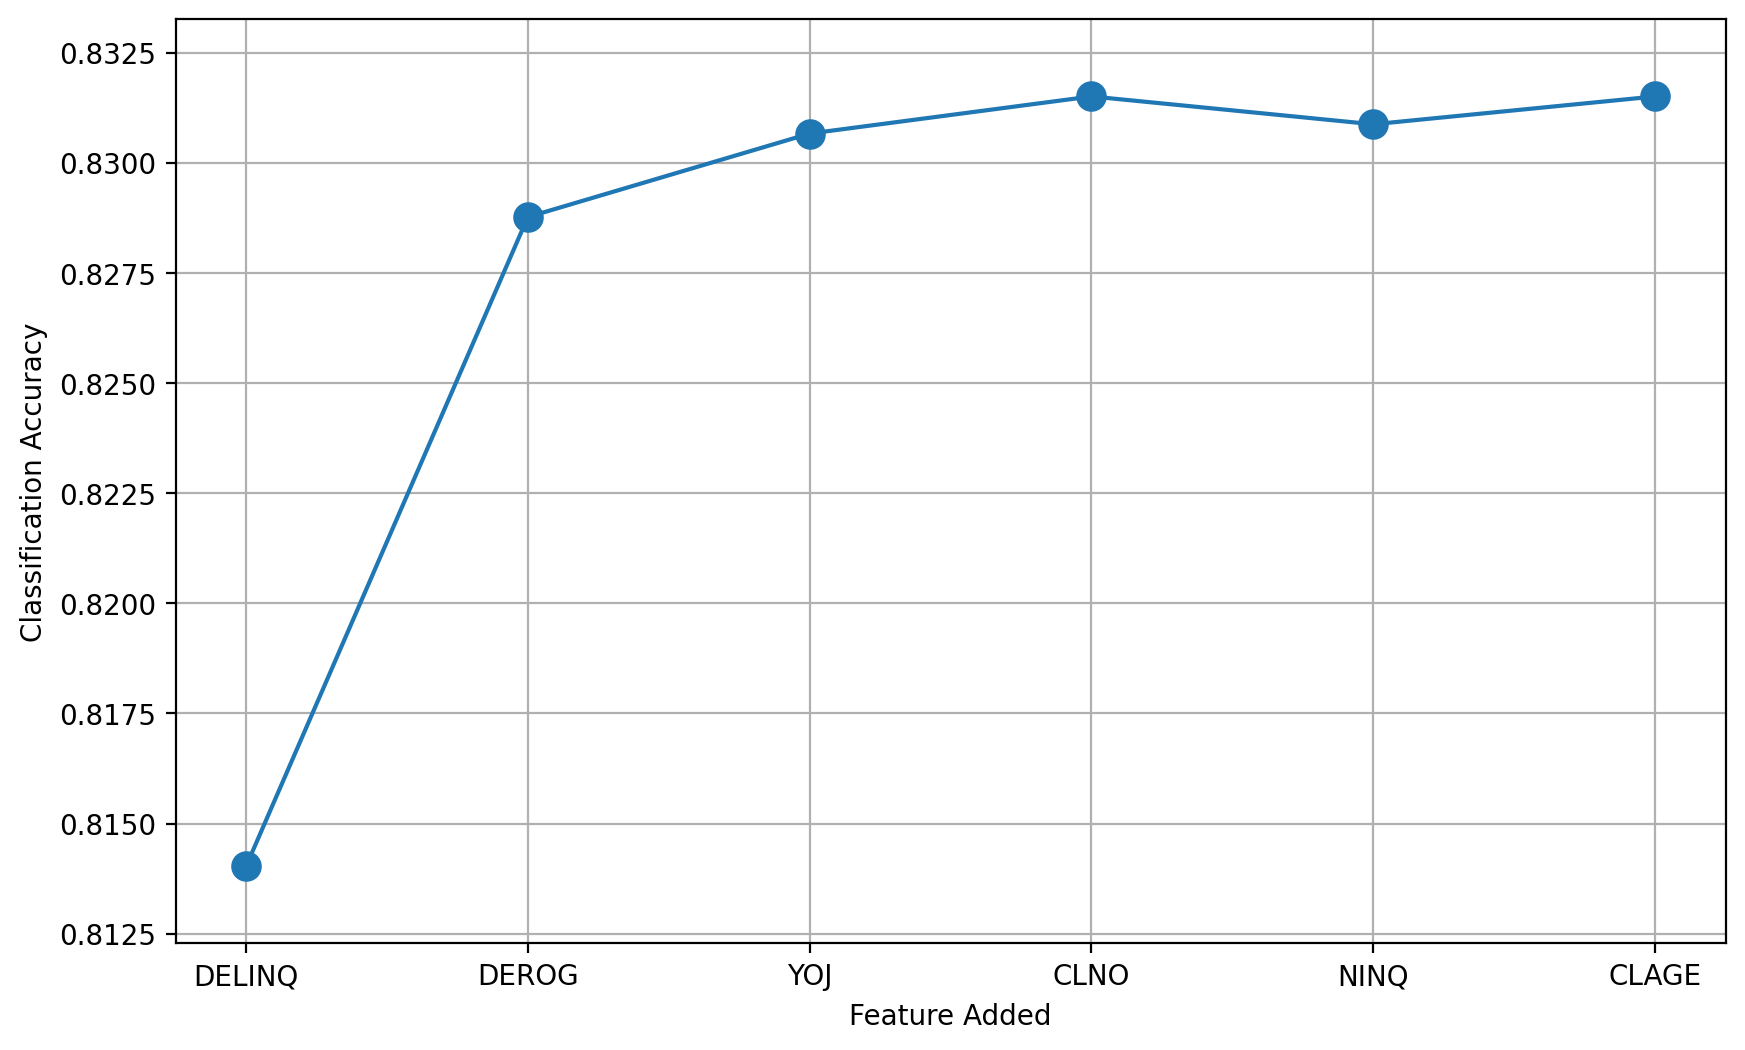

In [10]:
plt.figure(figsize = (10,6), dpi = 200)
plt.plot(accuracy_result['Feature Added'], accuracy_result['Accuracy'], marker = 'o', markersize = 10)
plt.xlabel('Feature Added')
plt.ylabel('Classification Accuracy')
plt.grid(axis = 'both')
plt.margins(y = 0.1)
plt.show()

## Conclude 
- My final selection is {DELINQ, DEROG, YOJ, CLNO}My final selection is {DELINQ, DEROG, YOJ, CLNO}

# Name: Week 7 MultiClass SVM (Nominal Classification)

## Multi-class Targert Variable

- When the target variable has more than two categories, we will train multiple SVM models using the **OVR approach.**
- This approach trains an SVM classifier for **one target class versus the others.**
- For example, the target class has A, B, and C categories.  We will train three SVM models: (1) A vs (B & C), (2) B vs (A & C), and (3) C vs (A & B).  **Then, “aggregate” the classification results.**



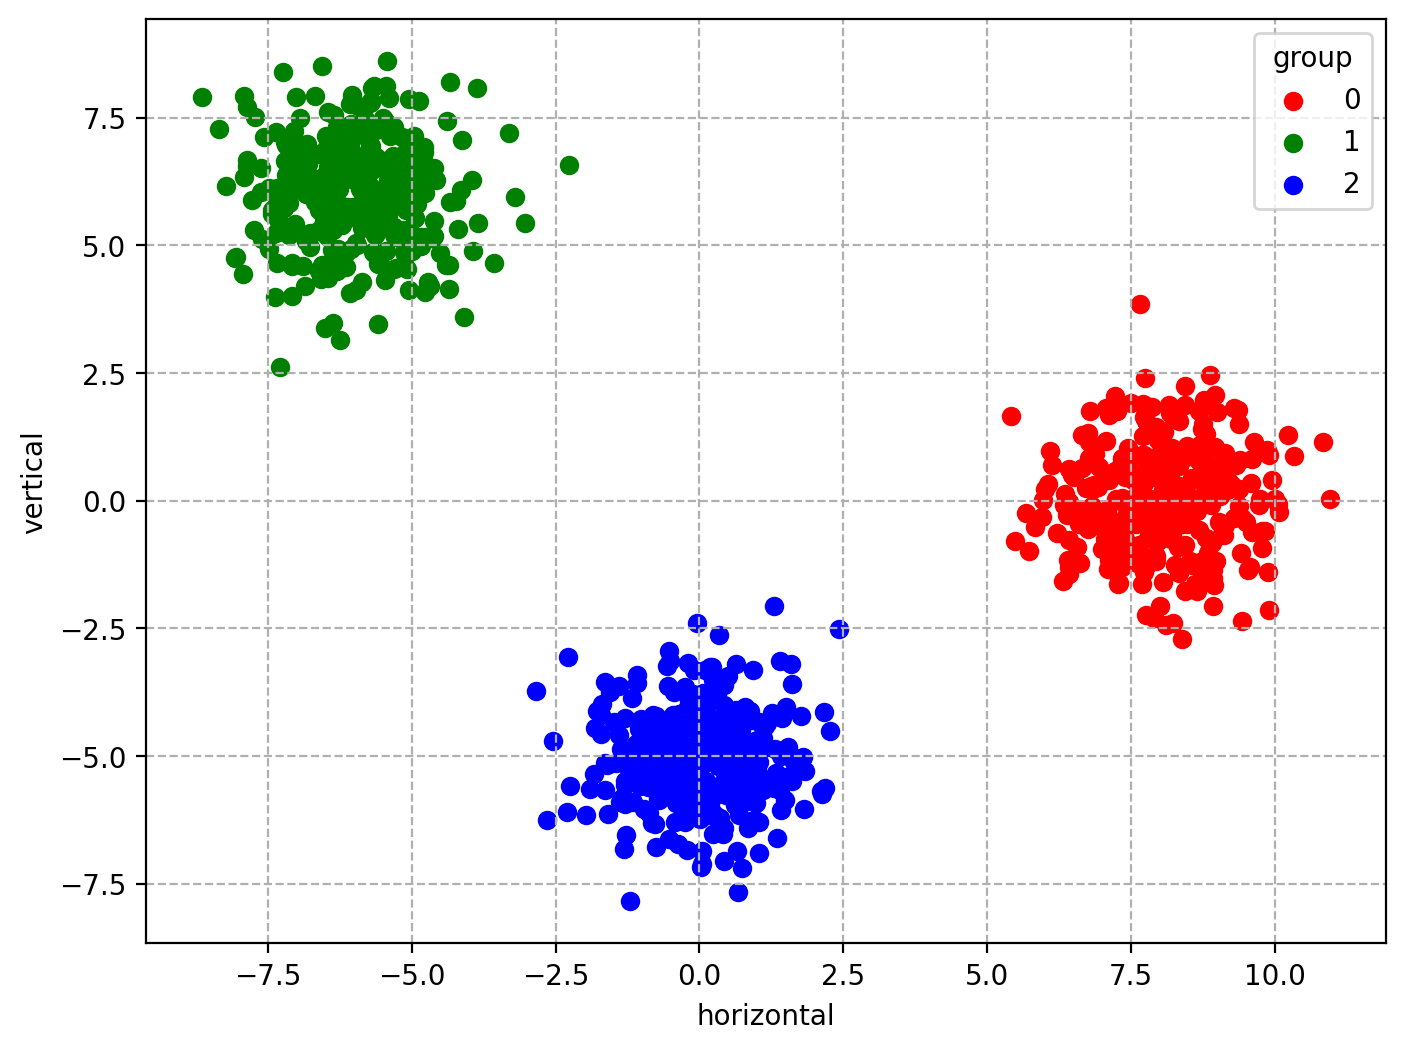

In [11]:

import matplotlib.pyplot as plt
import numpy
import pandas
import sys

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

from scipy.stats import norm, randint
from sklearn import metrics, svm

# Randomly generate some observations

n_sample = 1000
group = randint.rvs(0, 3, size = 1000, random_state = 20230225)
horizontal = norm.rvs(loc = 0.0, scale = 1.0, size = 1000, random_state = 52203202)
vertical = norm.rvs(loc = 0.0, scale = 1.0, size = 1000, random_state = 27513)

horizontal = horizontal + numpy.where(group == 0, 8, 0)
horizontal = horizontal + numpy.where(group == 1, -6, 0)

vertical = vertical + numpy.where(group == 1, 6, 0)
vertical = vertical + numpy.where(group == 2, -5, 0)

train_data = pandas.DataFrame({'group': group, 'horizontal': horizontal, 'vertical': vertical})

# See the groups of points
cmap = ['red', 'green', 'blue']
plt.figure(figsize = (8,6), dpi = 200)
for j in range(3):
    plot_data = train_data[train_data['group'] == j]
    plt.scatter(plot_data['horizontal'], plot_data['vertical'], c = cmap[j], label = str(j))
plt.xlabel('horizontal')
plt.ylabel('vertical')
plt.grid(axis = 'both', linestyle = '--')
plt.legend(title = 'group')
plt.show()



In [12]:
X_train = train_data[['horizontal','vertical']]
y_train = train_data['group']

# Train a multi-class SVM model
svm_Model = svm.LinearSVC(dual = False, random_state = 20320225, C = 0.5, max_iter = 10000)
thisFit = svm_Model.fit(X_train, y_train) 
y_pred_train = thisFit.predict(X_train)

print('Mean Accuracy = ', metrics.accuracy_score(y_train, y_pred_train))

print('Intercept = ', thisFit.intercept_)
print('Coefficients = ', thisFit.coef_)



Mean Accuracy =  1.0
Intercept =  [-0.9692314522 -0.3203723059 -0.5308065635]
Coefficients =  [[ 0.3531176677  0.1633013155]
 [-0.2567460424  0.3603265199]
 [-0.2871486078 -0.8098630572]]


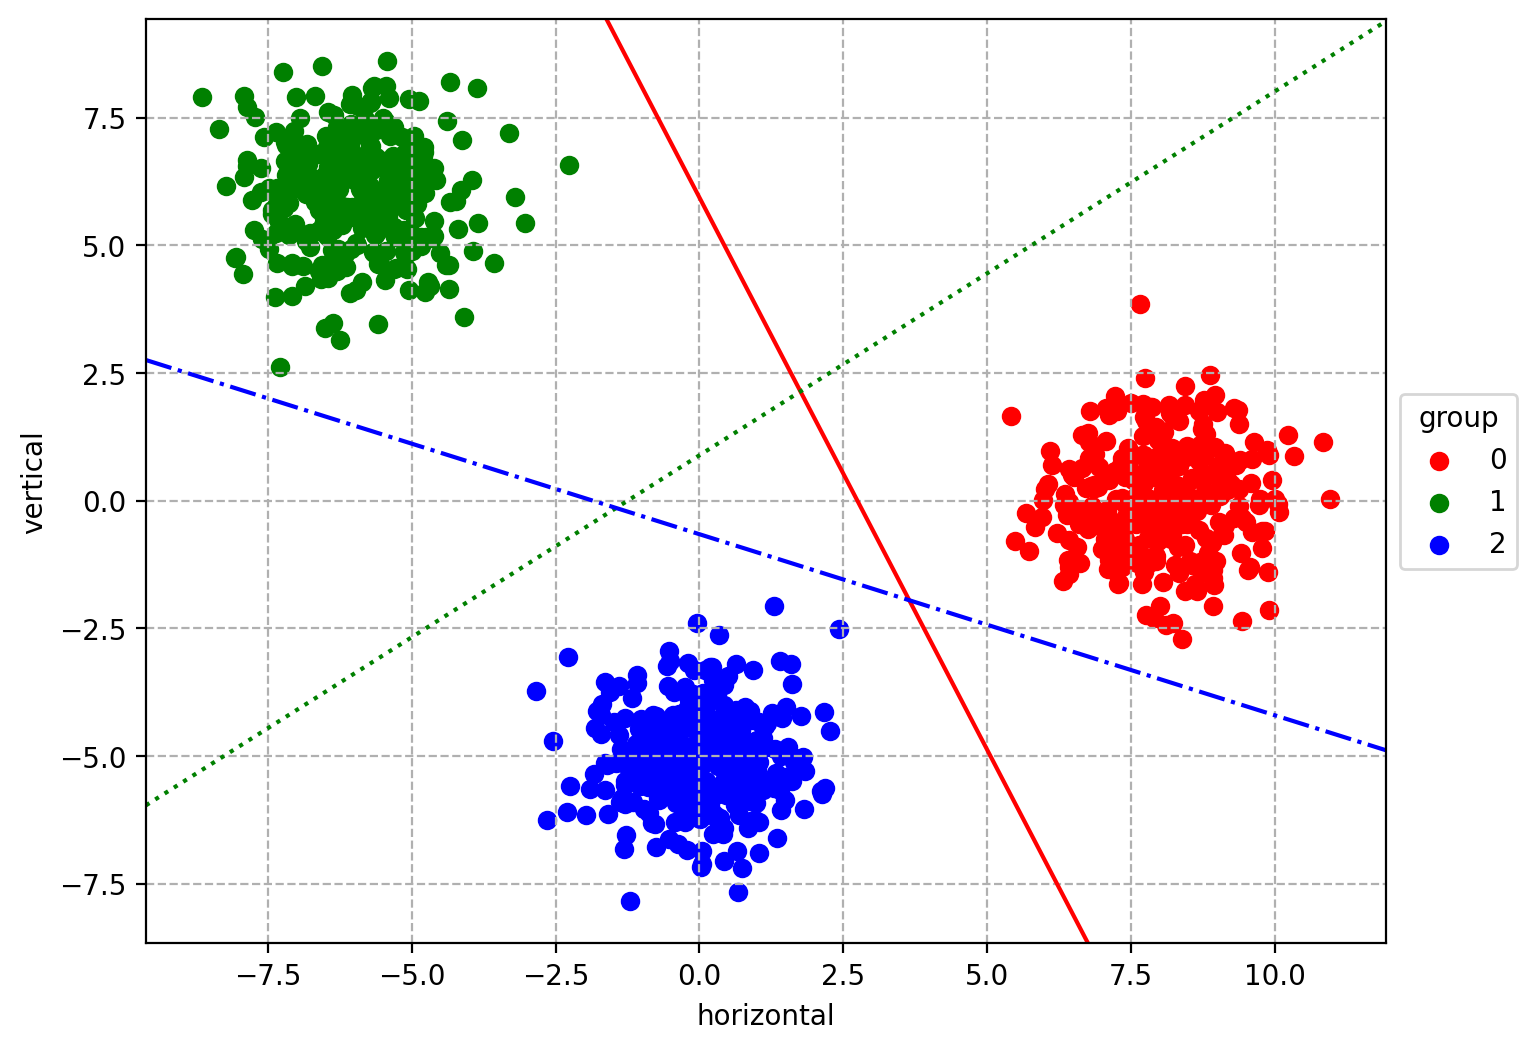

In [13]:
# A fixed point on the horizontal axis
h_point = X_train['horizontal'].mean()

# Add the linear separators to the observations
cmap = ['red', 'green', 'blue']
lsty = ['-', ':', '-.']
plt.figure(figsize = (8,6), dpi = 200)
for j in range(3):
   plot_data = train_data[train_data['group'] == j]
   plt.scatter(plot_data['horizontal'], plot_data['vertical'], c = cmap[j], label = str(j))
   w = thisFit.coef_[j,:]
   line_slope = - w[0] / w[1]
   v_point = line_slope * h_point - (thisFit.intercept_[j]) / w[1]
   plt.axline((h_point, v_point), slope = line_slope, linestyle = lsty[j], c = cmap[j])
plt.xlabel('horizontal')
plt.ylabel('vertical')
plt.grid(axis = 'both', linestyle = '--')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), title = 'group')
plt.show()

## Conclution:
- Accuracy is 1
- Three separators
    RED: 0 vs (1, 2)
    GREEN: 1 vs (0, 2)
    BLUE 2 vs (0, 1)


# Name: Week 7 BMI SVM(Ordinal Classification)

- The bmi_men.xlsx data contains `weight` (in kilograms), `height` (in meters), and `bmi_status` of 1000 men
- The `bmi_status` has four categories, namely, Underweight, Normal Weight, Overweight, and Obesity.
- BMI = Weight / (Height * Height)
- Let us predict `bmi_status` based on `weight` and `height`.


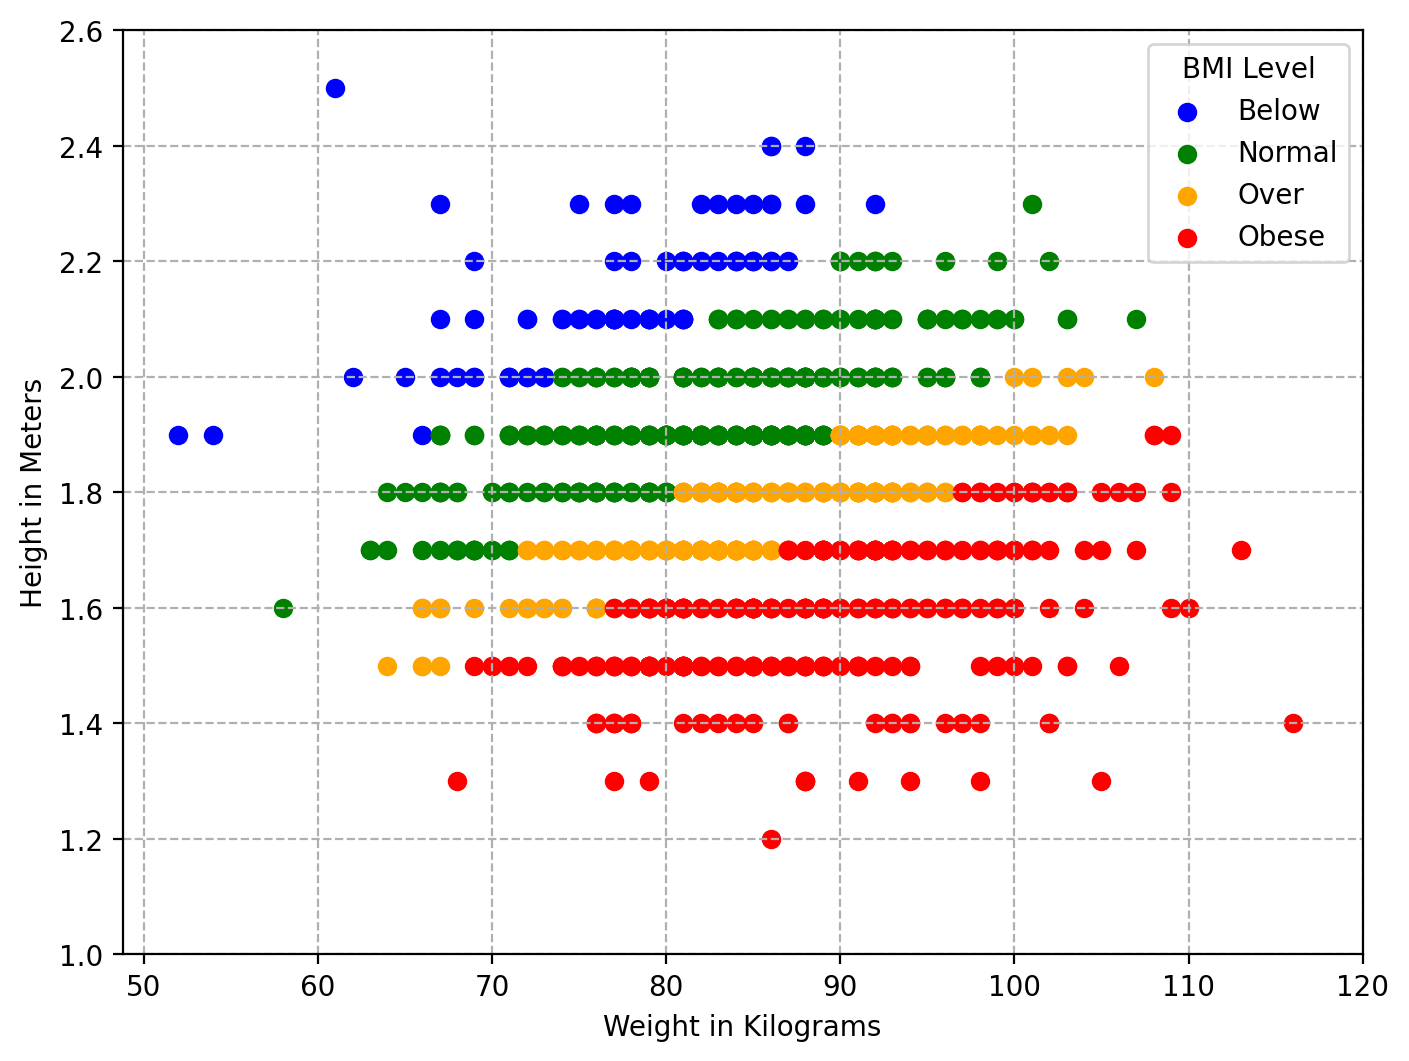

In [42]:

import matplotlib.pyplot as plt
import numpy
import pandas
import sys

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

import matplotlib.pyplot as plt
import numpy
import pandas
import sys

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

from sklearn import metrics, svm

# Specify the roles
feature = ['weight','height']
target = 'bmi_status'

# Read the Excel file
input_data = pandas.read_excel('bmi_men.xlsx')
bmi_men = input_data[feature + [target]].dropna().reset_index(drop = True)

cmap = ['blue', 'green', 'orange', 'red']
slabel = ['Below', 'Normal', 'Over', 'Obese']
plt.figure(figsize = (8,6), dpi = 200)
for status in range(4):
    plot_data = bmi_men[bmi_men['bmi_status'] == (status+1)]
    plt.scatter(plot_data['weight'], plot_data['height'], c = cmap[status], label = slabel[status])
plt.xlabel('Weight in Kilograms')
plt.ylabel('Height in Meters')
plt.xticks(numpy.arange(50, 130, 10))
plt.yticks(numpy.arange(1.0, 2.8, 0.2))
plt.grid(axis = 'both', linestyle = '--')
plt.legend(title = 'BMI Level')
plt.show()


In [43]:
X_train = bmi_men[feature]
weight_mean = X_train['weight'].mean()

# Train a SVM model for nominal multi-class
svm_Model = svm.LinearSVC(dual = False, random_state = 20221225, C =  0.5, max_iter = 10000)
y_train = bmi_men[target]
thisFit = svm_Model.fit(X_train, y_train) 
y_train_pred = thisFit.predict(X_train)

print('Mean Accuracy = ', metrics.accuracy_score(y_train, y_train_pred))

print('Intercept = ', thisFit.intercept_)
print('Coefficients = ', thisFit.coef_)

Mean Accuracy =  0.693
Intercept =  [-2.9380276433 -2.0582271696 -0.1252717899  3.7653206023]
Coefficients =  [[-8.6371197119e-02  4.6274522521e+00]
 [-2.7156321019e-02  2.2435386713e+00]
 [ 4.4952639848e-03 -3.9876162560e-01]
 [ 8.9919899854e-02 -6.8392620097e+00]]


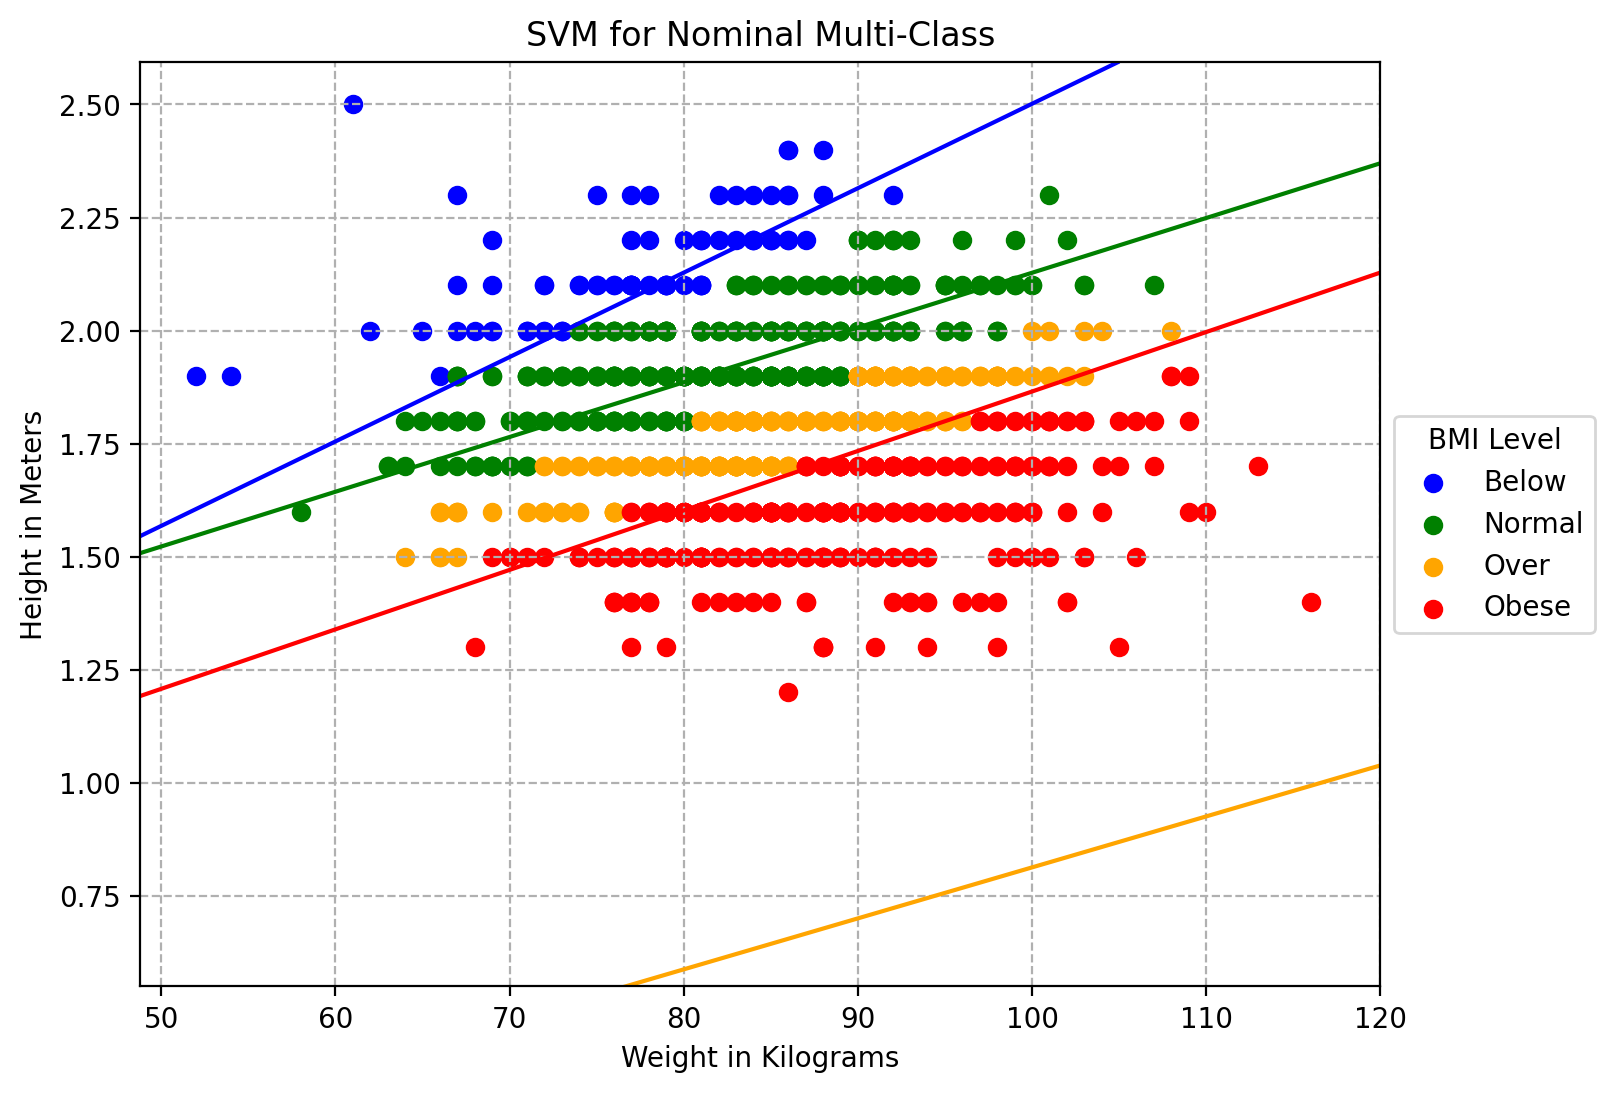

In [44]:

# plot the line, the points, and the nearest vectors to the plane
cmap = ['blue', 'green', 'orange', 'red']
slabel = ['Below', 'Normal', 'Over', 'Obese']
plt.figure(figsize = (8,6), dpi = 200)
plt.title('SVM for Nominal Multi-Class')
for bmi_group in [1,2,3,4]:
   plot_data = bmi_men[bmi_men['bmi_status'] == bmi_group]
   plt.scatter(plot_data['weight'], plot_data['height'], c = cmap[bmi_group-1], label = slabel[bmi_group-1])

   w0 = thisFit.intercept_[bmi_group-1]
   wvec = thisFit.coef_[(bmi_group-1),:]

   line_slope = - wvec[0] / wvec[1]
   height_point = - (w0 + wvec[0] * weight_mean) / wvec[1]

   plt.axline((weight_mean, height_point), slope = line_slope, c = cmap[bmi_group-1])

plt.xlabel('Weight in Kilograms')
plt.ylabel('Height in Meters')
plt.xticks(numpy.arange(50, 130, 10))
plt.grid(axis = 'both', linestyle = '--')
plt.legend(title = 'BMI Level', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()



## Conclusion & Problem:
### The four BMI groups are obvious, but they have no clear buffers in between.
- LinearSVC trains 4 SVM:
1. Below vs (Normal & Over & Obese)
2. Normal vs (Below & Over & Obese)
3. Over vs (Below & Normal & Obese)
4. Obese vs (Below & Normal & Over)
- Mean Accuracy is 0.693
- The four BMI levels are separated, but not with any wide margins
- One separator (Over) seems redundant and misplaced.


BMI Group <=  1
Mean Accuracy =  0.976
Intercept =  2.938027643287445
Coefficients =  [ 0.0863711971 -4.6274522521]
BMI Group <=  2
Mean Accuracy =  0.968
Intercept =  4.526518992669502
Coefficients =  [ 0.0967522558 -6.8906597156]
BMI Group <=  3
Mean Accuracy =  0.977
Intercept =  3.765320602318611
Coefficients =  [ 0.0899198999 -6.8392620097]


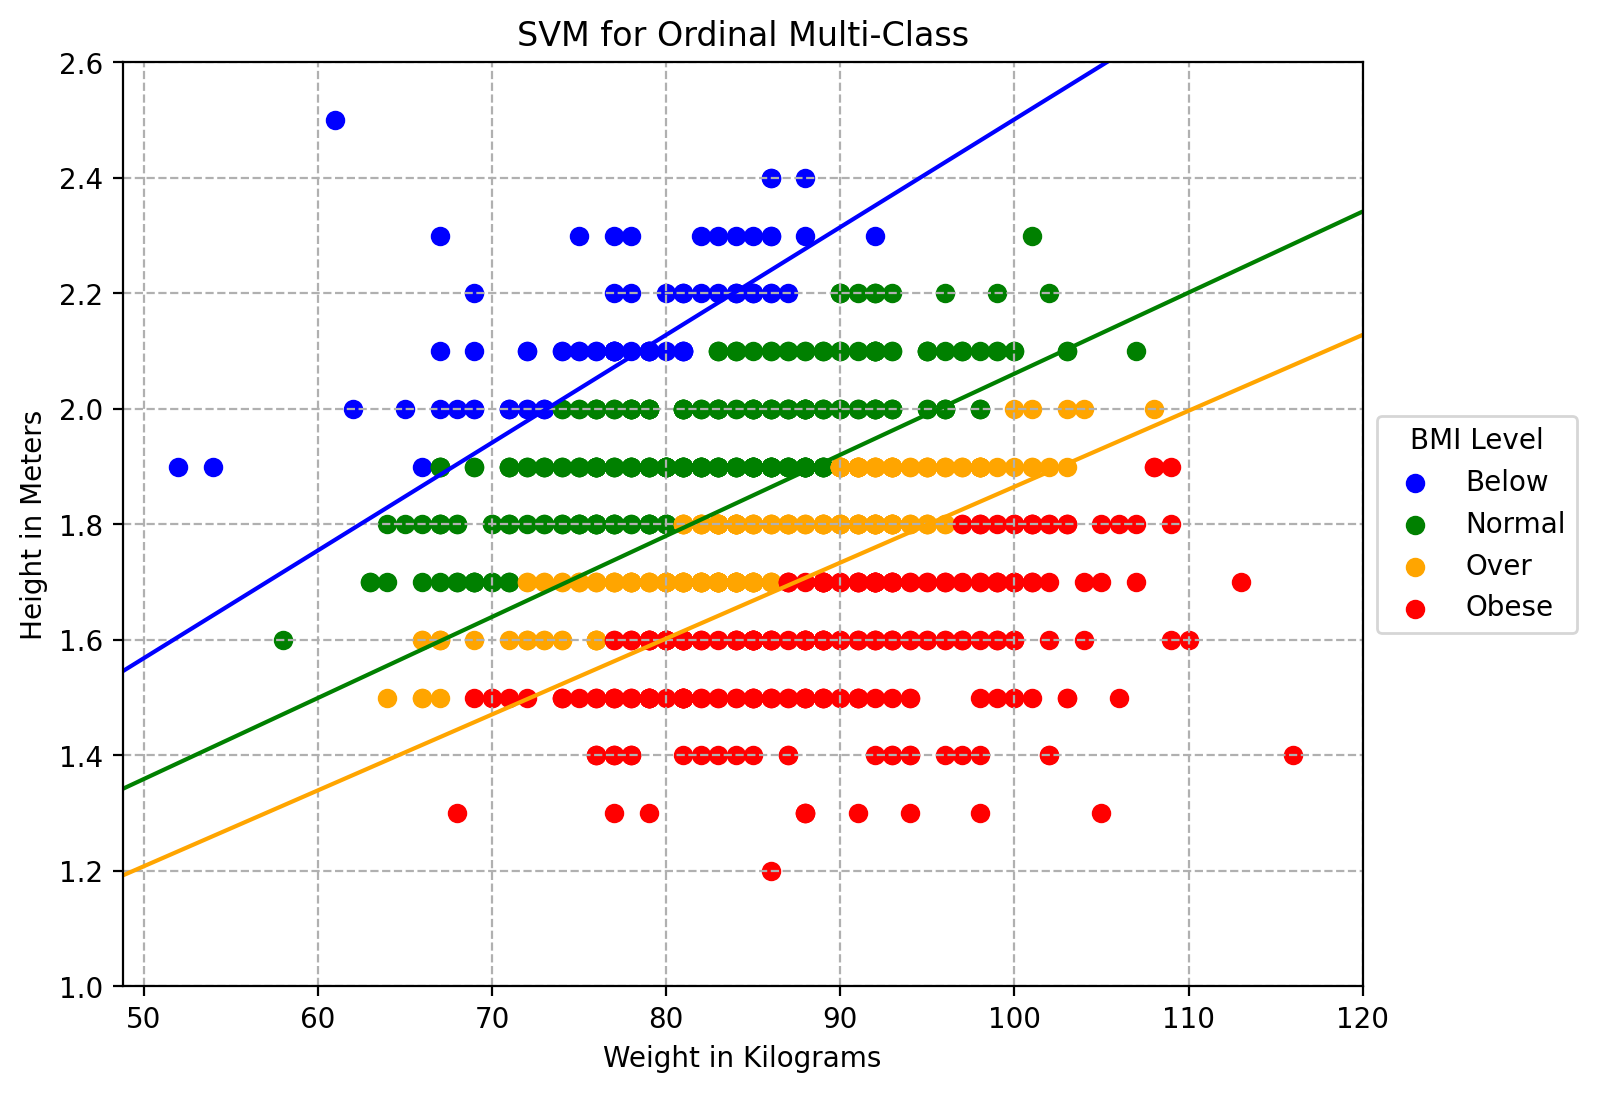

In [45]:
# Train a SVM for ordinal multi-class, plot the line, the points, and the nearest vectors to the plane
cmap = ['blue', 'green', 'orange', 'red']
slabel = ['Below', 'Normal', 'Over', 'Obese']
plt.figure(figsize = (8,6), dpi = 200)
plt.title('SVM for Ordinal Multi-Class')

for bmi_group in [1,2,3,4]:
   plot_data = bmi_men[bmi_men['bmi_status'] == bmi_group]
   plt.scatter(plot_data['weight'], plot_data['height'], c = cmap[bmi_group-1], label = slabel[bmi_group-1])

   if (bmi_group < 4):
      y_train = numpy.where(bmi_men[target] <= bmi_group, 0, 1)
      svm_Model = svm.LinearSVC(dual = False, random_state = 20221225, C = 0.5, max_iter = 10000)
      thisFit = svm_Model.fit(X_train, y_train) 
      y_pred_train = thisFit.predict(X_train)

      print('BMI Group <= ', bmi_group)
      print('Mean Accuracy = ', metrics.accuracy_score(y_train, y_pred_train))
      
      w0 = thisFit.intercept_[0]
      wvec = thisFit.coef_[0]
      print('Intercept = ', w0)
      print('Coefficients = ', wvec)

      line_slope = - wvec[0] / wvec[1]
      height_point = - (w0 + wvec[0] * weight_mean) / wvec[1]

      plt.axline((weight_mean, height_point), slope = line_slope, c = cmap[bmi_group-1])

plt.xlabel('Weight in Kilograms')
plt.ylabel('Height in Meters')
plt.xticks(numpy.arange(50, 130, 10))
plt.yticks(numpy.arange(1.0, 2.8, 0.2))
plt.grid(axis = 'both', linestyle = '--')
plt.legend(title = 'BMI Level', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

## Conclusion & Solution:
### We train 3 SVM manually:
1. Below vs (Normal & Over & Obese)
2. (Below & Normal) vs (Over & Obese)
3. (Below & Normal & Over) vs Obese
- The four BMI levels are separated, but not with any wide margins


# Name: Week 7 SVM Three Segment(An Example of Nonlinear Support Vector Machine)

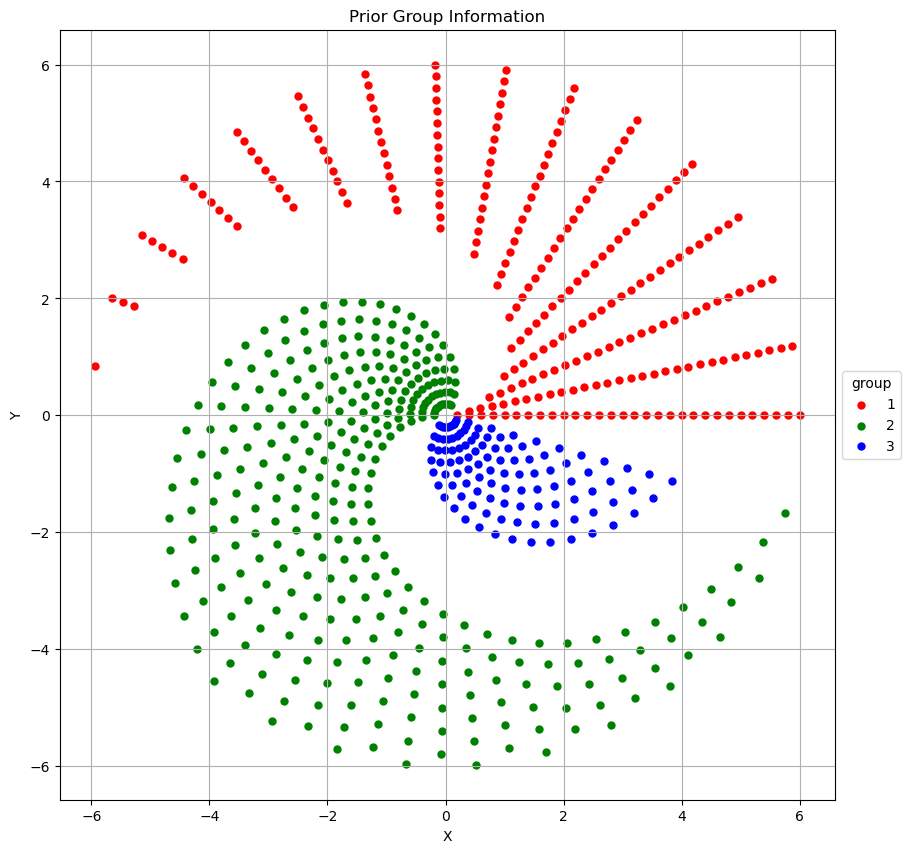

In [20]:

import matplotlib.pyplot as plt
import numpy
import pandas
import sys

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

from sklearn import metrics, svm

trainData = pandas.read_excel('ThreeSegment.xlsx',
                              sheet_name = 'ThreeSegment', usecols = ['Group', 'X', 'Y'])


# Scatterplot that uses prior information of the grouping variable
carray = ['red', 'green', 'blue']
plt.figure(figsize=(10,10))
for i in range(3):
   subData = trainData[trainData['Group'] == (i+1)]
   plt.scatter(x = subData['X'], y = subData['Y'], c = carray[i], label = (i+1), s = 25)
plt.grid(True)
plt.title('Prior Group Information')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), title = 'group')
plt.show()



In [21]:
# Build Support Vector Machine classifier
X_train = trainData[['X','Y']]
y_train = trainData['Group']

x_point = X_train['X'].mean()

svm_Model = svm.LinearSVC(dual = False, random_state = 20221225, max_iter = 10000)
thisFit = svm_Model.fit(X_train, y_train) 
y_pred_train = thisFit.predict(X_train)

print('Cartesian Coordinate Mean Accuracy = ', metrics.accuracy_score(y_train, y_pred_train))
trainData['_PredictedClass_'] = y_pred_train

print('=== Confusion Matrix ===')
print(metrics.confusion_matrix(y_train, trainData['_PredictedClass_']))

print('Intercept = ', thisFit.intercept_)
print('Coefficients = ', thisFit.coef_)



Cartesian Coordinate Mean Accuracy =  0.781294964028777
=== Confusion Matrix ===
[[238  17   0]
 [ 24 301   5]
 [  4 102   4]]
Intercept =  [-0.7907879786 -0.0458674277 -0.6912960209]
Coefficients =  [[ 0.350118031   0.7958896976]
 [-0.275115583  -0.2936047   ]
 [ 0.0562631402 -0.0518425711]]


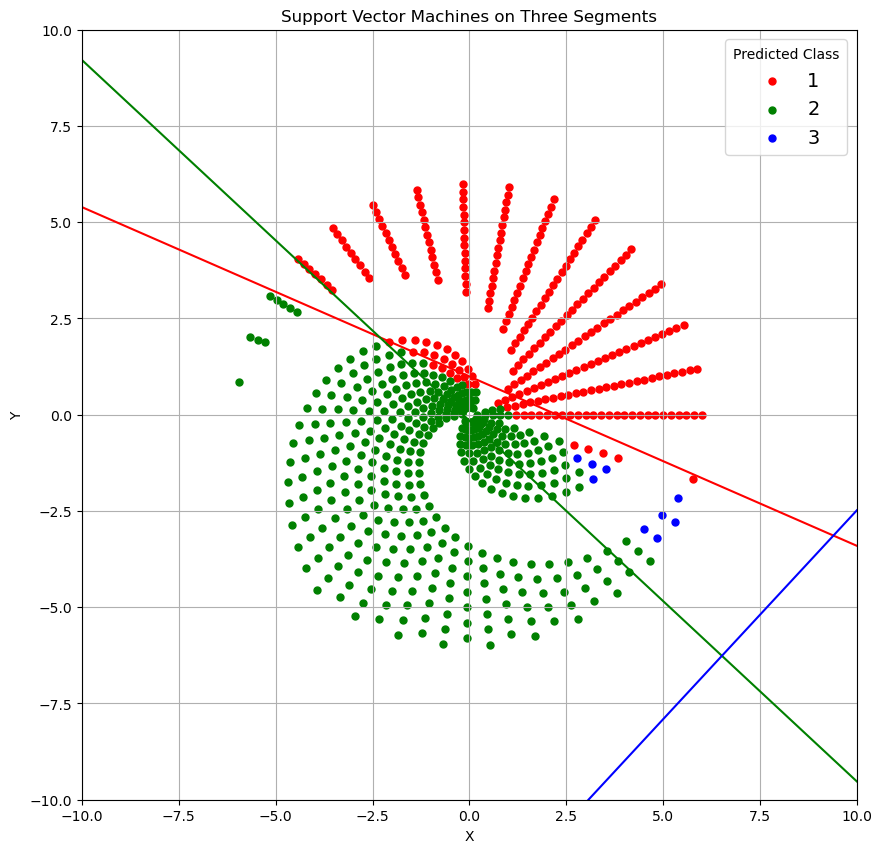

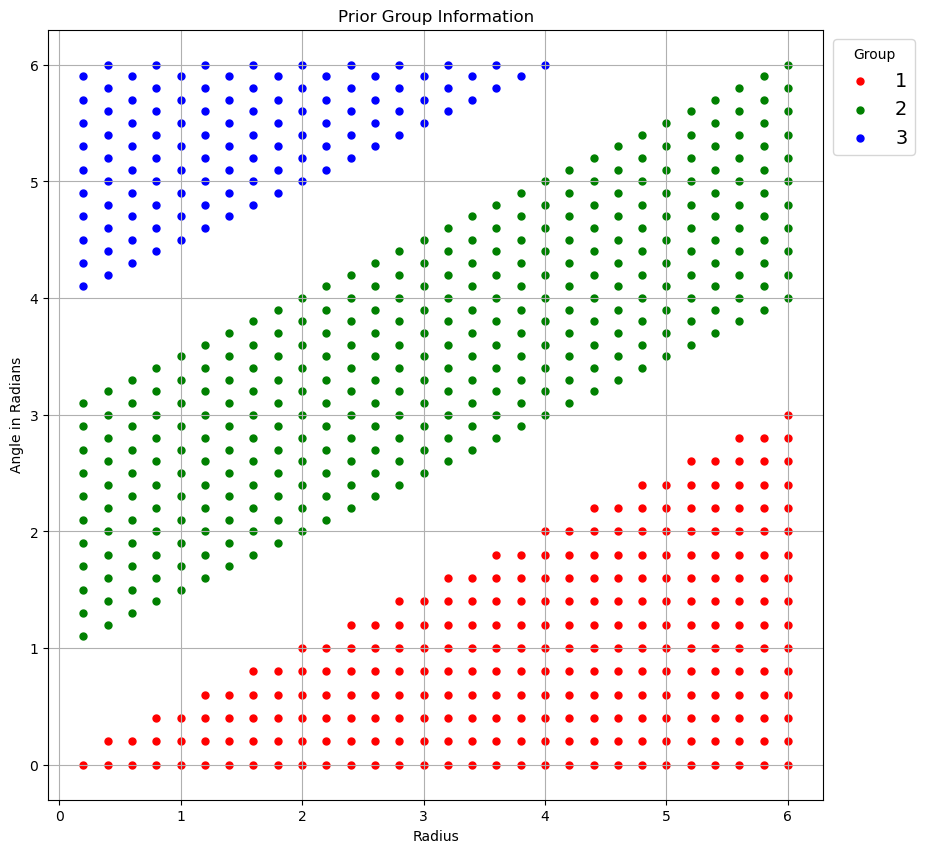

In [22]:
# plot the line, the points, and the nearest vectors to the plane
carray = ['red', 'green', 'blue']
plt.figure(figsize=(10,10))
for j in range(3):
   subData = trainData[trainData['_PredictedClass_'] == (j+1)]
   plt.scatter(x = subData['X'], y = subData['Y'], c = carray[j], label = (j+1), s = 25)
    
   w0 = thisFit.intercept_[j]
   wvec = thisFit.coef_[j,:]
   line_slope = - wvec[0] / wvec[1]
   y_point = - (w0 + wvec[0] * x_point) / wvec[1] 
   plt.axline((x_point, y_point), slope = line_slope, c = carray[j])

plt.grid(True)
plt.title('Support Vector Machines on Three Segments')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.legend(title = 'Predicted Class', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.show()

# Convert to the polar coordinates
trainData['radius'] = numpy.sqrt(trainData['X']**2 + trainData['Y']**2)
trainData['theta'] = numpy.arctan2(trainData['Y'], trainData['X'])

def customArcTan (z):
   theta = numpy.where(z < 0.0, 2.0*numpy.pi+z, z)
   return (theta)

trainData['theta'] = trainData['theta'].apply(customArcTan)

# Scatterplot that uses prior information of the grouping variable
carray = ['red', 'green', 'blue']
plt.figure(figsize=(10,10))
for i in range(3):
   subData = trainData[trainData['Group'] == (i+1)]
   plt.scatter(x = subData['radius'], y = subData['theta'], c = carray[i], label = (i+1), s = 25)
plt.grid(True)
plt.title('Prior Group Information')
plt.xlabel('Radius')
plt.ylabel('Angle in Radians')
plt.legend(title = 'Group', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.show()



Polar Coordinate Mean Accuracy =  0.9942446043165467
=== Confusion Matrix ===
[[255   0   0]
 [  0 330   0]
 [  0   4 106]]
Intercept =  0.7827116839526099
Coefficients =  [ 0.8827307367 -1.7439102701]
Intercept =  -0.5785995279213684
Coefficients =  [-0.0049875708  0.1885945605]
Intercept =  -3.808136417998765
Coefficients =  [-0.6797172525  1.153774315 ]


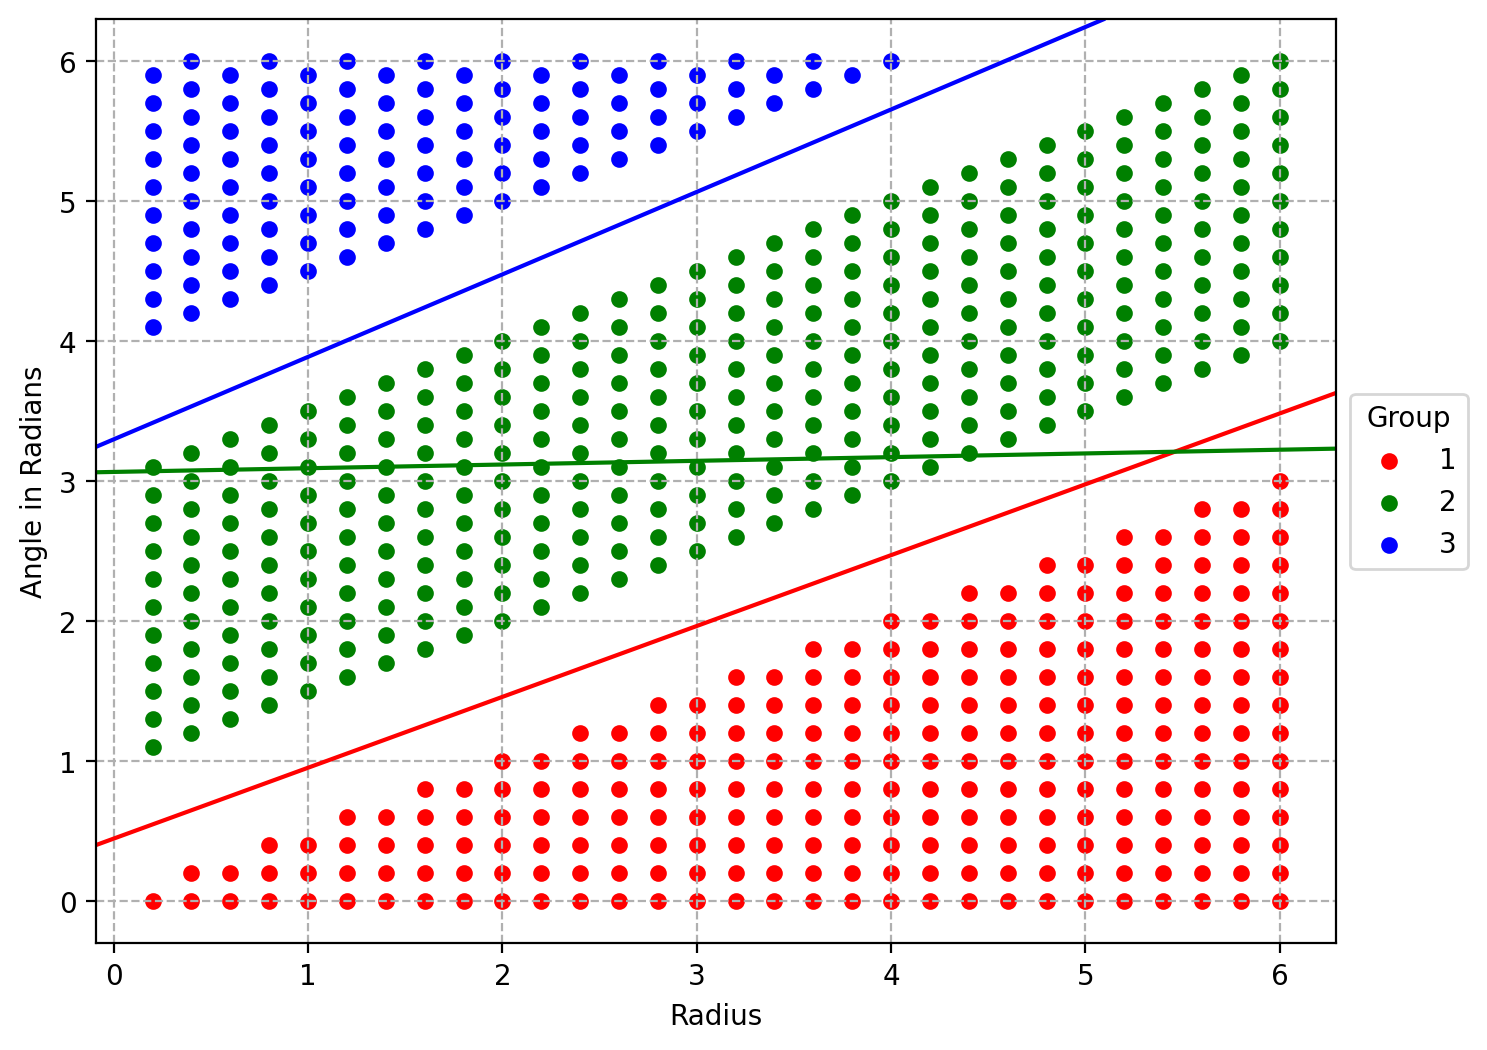

In [23]:
P_train = trainData[['radius','theta']]
r_point = trainData['radius'].mean()

r_vec = numpy.arange(0.0, 6.05, 0.05)
t_vec = numpy.empty((len(r_vec), 3), dtype = float)

# Train a SVM for nominal multi-class, plot the line, the points, and the nearest vectors to the plane
svm_Model = svm.LinearSVC(dual = False, random_state = 20221225, C = 0.5, max_iter = 50000)
thisFit = svm_Model.fit(P_train, y_train)

trainData['y_pred_Polar'] = thisFit.predict(P_train)
print('Polar Coordinate Mean Accuracy = ', metrics.accuracy_score(y_train, trainData['y_pred_Polar']))

print('=== Confusion Matrix ===')
print(metrics.confusion_matrix(y_train, trainData['y_pred_Polar']))
      
cmap = ['red', 'green', 'blue']
plt.figure(figsize = (8,6), dpi = 200)

for i in range(3):
   group_id = i + 1
   subData = trainData[trainData['Group'] == group_id]
   plt.scatter(x = subData['radius'], y = subData['theta'], c = carray[i], label = (i+1), s = 25) 
     
   w0 = thisFit.intercept_[i]
   wvec = thisFit.coef_[i,:]
   print('Intercept = ', w0)
   print('Coefficients = ', wvec)

   line_slope = - wvec[0] / wvec[1]
   t_point = - (w0 + wvec[0] * r_point) / wvec[1]
   t_vec[:,i] = - (w0 + wvec[0] * r_vec) / wvec[1]

   plt.axline((r_point, t_point), slope = line_slope, c = carray[i])

plt.xlabel('Radius')
plt.ylabel('Angle in Radians')
plt.legend(title = 'Group', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.grid(axis = 'both', linestyle = '--')
plt.legend(title = 'Group', loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()



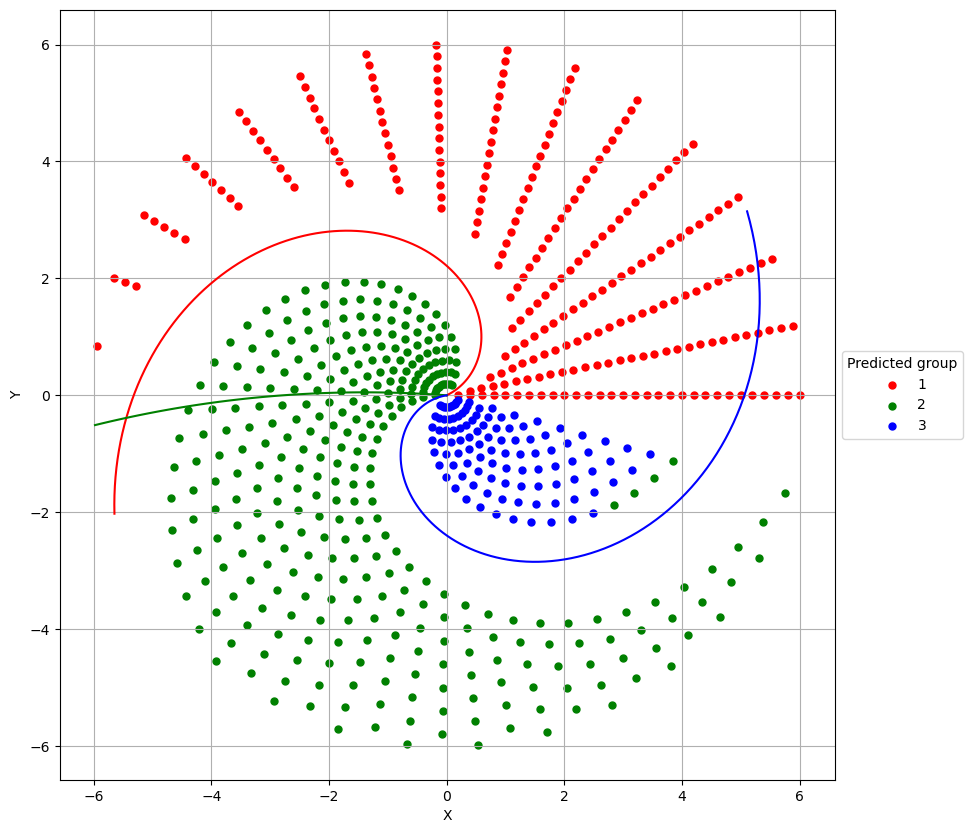

In [24]:
x_vec1 = r_vec * numpy.cos(t_vec[:,0])
y_vec1 = r_vec * numpy.sin(t_vec[:,0])

x_vec2 = r_vec * numpy.cos(t_vec[:,1])
y_vec2 = r_vec * numpy.sin(t_vec[:,1])

x_vec3 = r_vec * numpy.cos(t_vec[:,2])
y_vec3 = r_vec * numpy.sin(t_vec[:,2])
 
# plot the line, the points, and the nearest vectors to the plane
carray = ['red', 'green', 'blue']
plt.figure(figsize=(10,10))
for i in range(3):
   subData = trainData[trainData['y_pred_Polar'] == (i+1)]
   plt.scatter(x = subData['X'], y = subData['Y'], c = carray[i], label = (i+1), s = 25)
plt.plot(x_vec1, y_vec1, c = carray[0])
plt.plot(x_vec2, y_vec2, c = carray[1])
plt.plot(x_vec3, y_vec3, c = carray[2])
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), title = 'Predicted group')
plt.show()

## Conclude
- The separator for Group 2 is ineffective and unnecessary, we can omit it.
- However, except for four observations in Group 3, all observations are correctly classified.
- Accuracy is 99.42%. 


## Lecture Recap
- Originally designed for classifying a binary target variable, but now has been extended to a multi-class target variable.
- In addition to classification, Support Vector Machines also provide the hyperplane that best separates the two classes of the target variable.
- The hyperplane is chosen to maximize the distance between the hyperplane and the support vectors.  This helps the prediction of new data.
- Support Vector Machines work well for groups of compact observations.  However, it is likely to fail for groups of connected observations.
- We may transform the data to another coordinate system such that the segments are more separable.
